this project is meant to classifying the catorgorize of the fetus in term of some parameters, such as acceleration, fetal movement, uterine contractions, etc. the dataset that I use is from Kaggle (https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification).

# 1. Import Dataset

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
dataset = pd.read_csv('fetal_health.csv')
dataset.head(20)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.000,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.000,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.000,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.000,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.000,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
dataset.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [5]:
dataset.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

# 2. Preprocessing Dataset

### looking for correlation between parameter

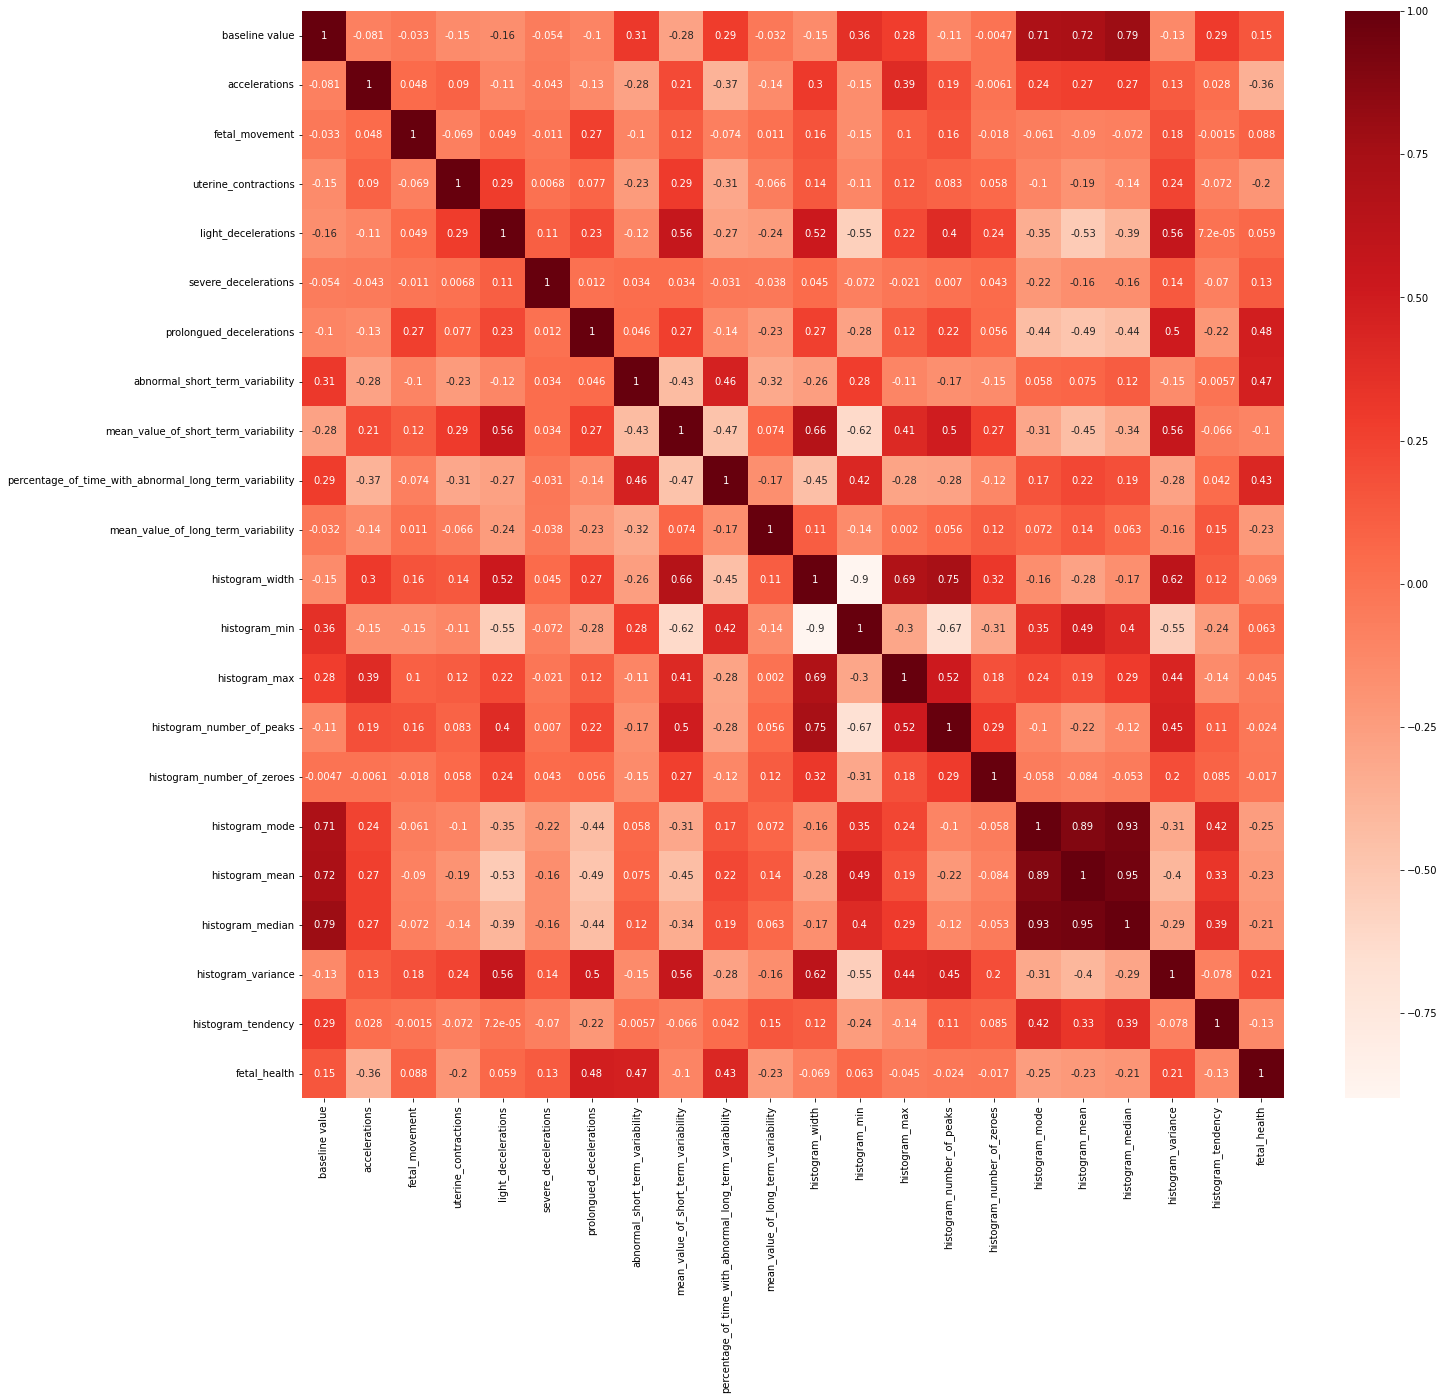

In [6]:
# Pearson Correlation
korelasi = dataset.corr()

plt.figure(figsize=(22,20))
sns.heatmap(korelasi, annot=True, cmap=plt.cm.Reds)
plt.show()

In [7]:
# using fetal health as the correlation check

target_korelasi = abs(korelasi['fetal_health'])
relevant_feat = target_korelasi[target_korelasi>0.3]
relevant_feat

accelerations                                             0.364066
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
fetal_health                                              1.000000
Name: fetal_health, dtype: float64

this parameter might be useful for some machine learning methods, but in this analysis, I am using Random forest so there's no need to choose the parameter, so that I throw all the parameter to the model without knowing the correlation between them.

# 3. Train Model

In [9]:
from sklearn.model_selection import train_test_split

x = dataset.iloc[:, :-1].copy()
y = dataset.iloc[:, -1].copy()

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.4, random_state=0)

In [21]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(max_depth=10, random_state=0)
model_forest.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=10, random_state=0)

In [22]:
y_pred = model_forest.predict(xtest)

# 4. Evaluate Model

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
# accuracy score
accuracy_score(ytest, y_pred)

0.9447708578143361

In [25]:
# confusion matrix
cf_matrix = confusion_matrix(ytest, y_pred)
cf_matrix

array([[651,   4,   1],
       [ 33,  90,   3],
       [  1,   5,  63]], dtype=int64)

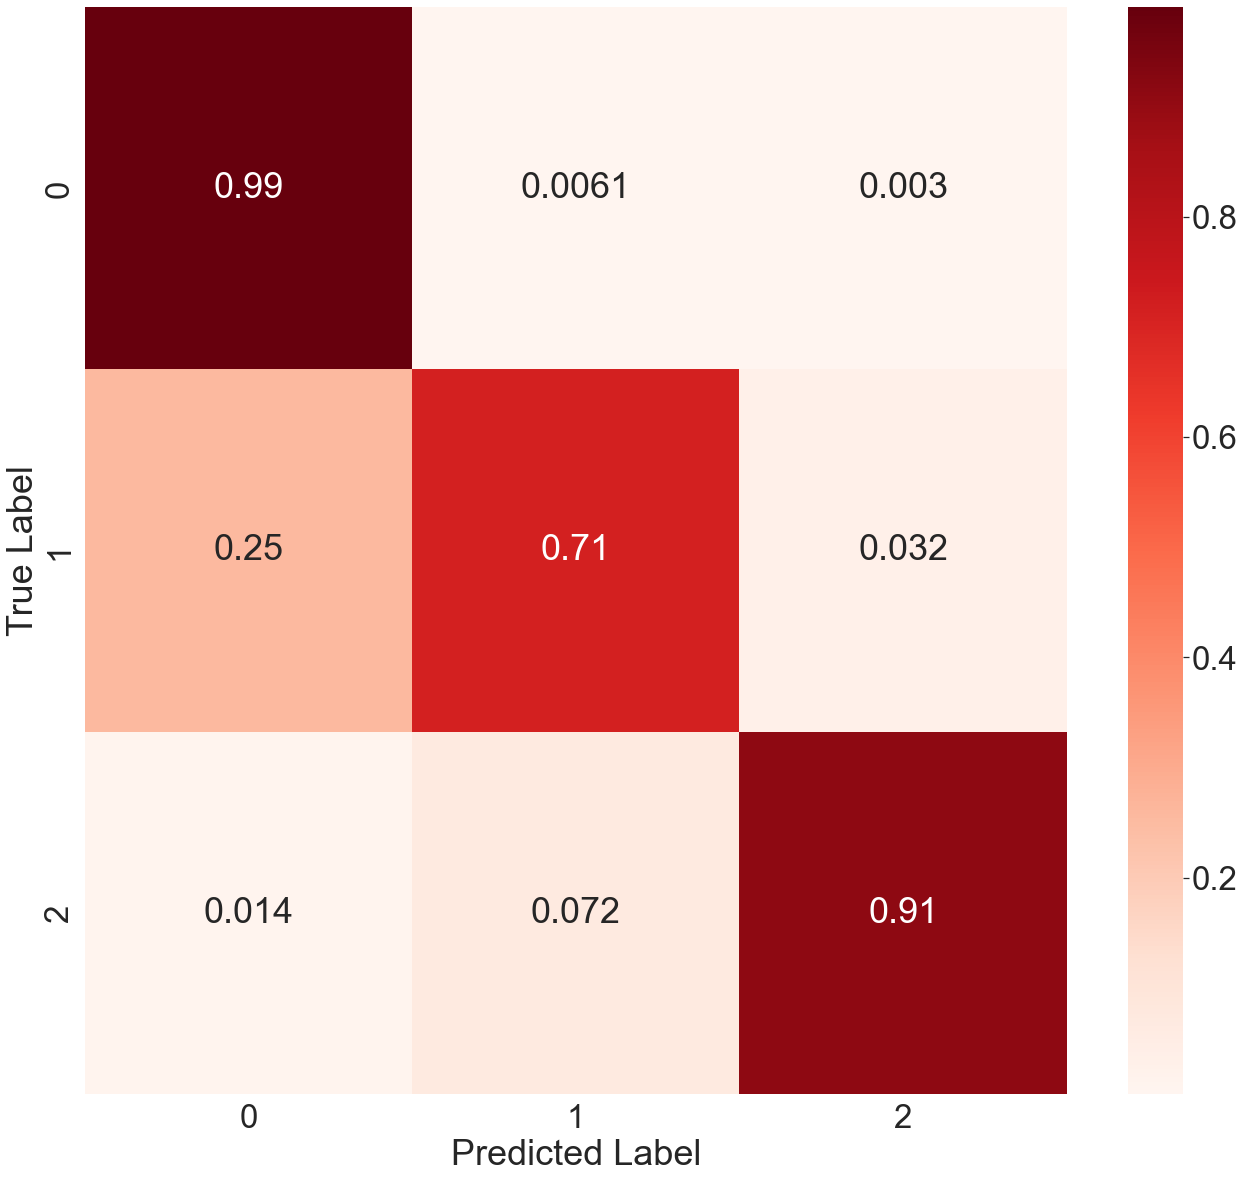

In [15]:
cf_matrix = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(22, 20))
sns.set(font_scale=3)
sns.heatmap(cf_matrix, annot=True, cmap=plt.cm.Reds)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [16]:
ytest.unique()

array([1., 2., 3.])

In [17]:
# classification report

print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

         1.0       0.95      0.99      0.97       656
         2.0       0.91      0.71      0.80       126
         3.0       0.91      0.91      0.91        69

    accuracy                           0.94       851
   macro avg       0.92      0.87      0.89       851
weighted avg       0.94      0.94      0.94       851



# 5. Using Hyp Tuning

In [18]:
model_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 100,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [43]:
# k-fold cross validation
from random import seed
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=20)
res = cross_val_score(model_forest, xtrain, ytrain, cv=kfold)
print(res)

[0.9375     0.9375     0.953125   0.96875    0.890625   0.890625
 0.953125   0.96875    0.96875    0.875      0.953125   0.953125
 0.9375     0.984375   0.984375   0.95238095 0.9047619  0.96825397
 0.92063492 0.92063492]


In [44]:
print('the accuracy: ', res.mean()*100)

the accuracy:  94.11458333333333


c:\Users\zakis\anaconda3\envs\tf1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


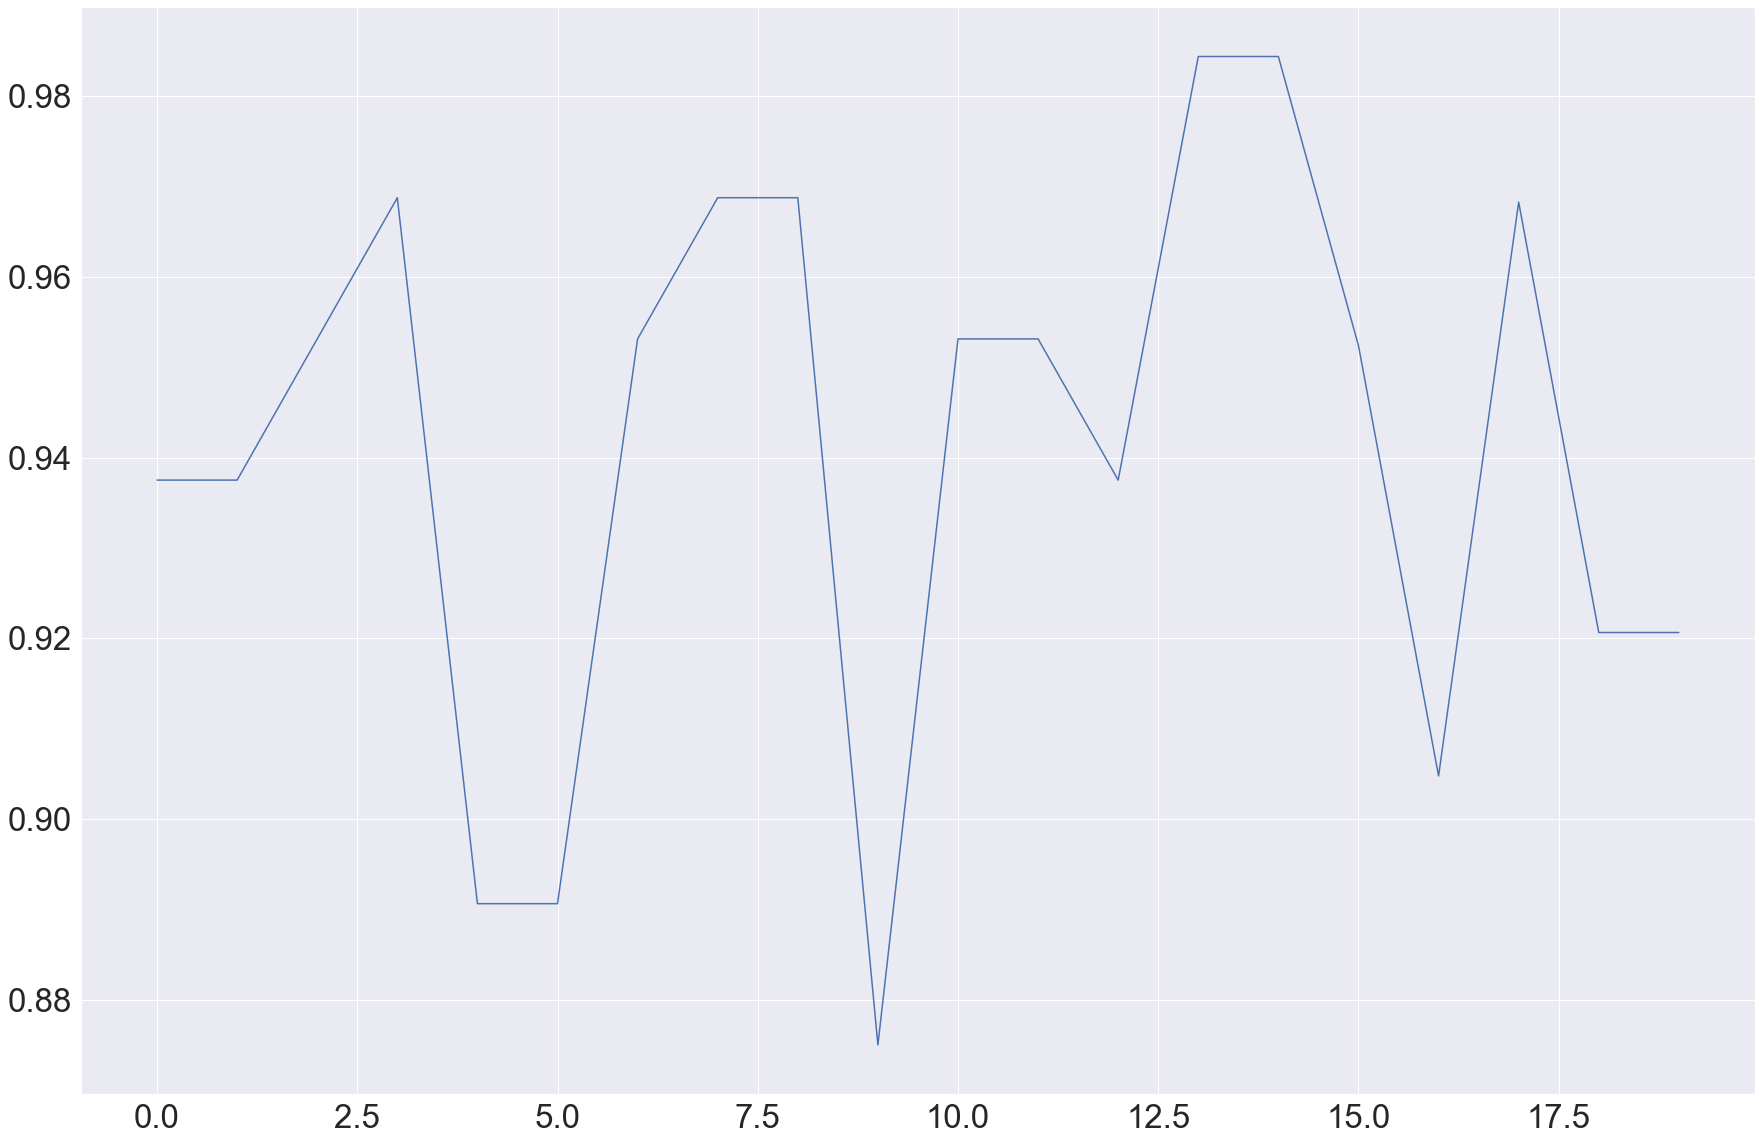

In [47]:
plt.figure(figsize=(30, 20))
x = [n for n in range(20)]
sns.lineplot(x, res)
plt.show()

In [48]:
model_forest = RandomForestClassifier(max_depth=14, random_state=0)
model_forest.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=14, random_state=0)

In [50]:
preds = model_forest.predict(xtest)

In [51]:
accuracy_score(ytest, preds)

0.9447708578143361

max accuracy that can be handle is 94.48% with the hyperparameter tuning and the limited size of the dataset.